In [72]:
# Import of all Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = [8,5]

# Function to load the CSV file

In [2]:
# Function to load data from CSV file
def load_housing_data():
    df = pd.read_csv('housing_data.csv')
    return df
df = load_housing_data ()   


In [3]:
# Display the first 5 rows of the data
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Data Samples

In [4]:
# Check the columns in the data frame
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
print(f"Total number of Rows    : {df.shape[0]} ")
print(f"Total number of Columns : {df.shape[1]}")

Total number of Rows    : 4600 
Total number of Columns : 18


# Check For Missing values :

In [7]:
display(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

There are no null values in the data set


# Numerical( Continuous & Discrete) and Categorical Attributes

In [8]:
# Seprating by the data type
categorical_attributes = [x for x in df.columns if df[x].dtype == 'object']
numerical_attributes = [x for x in df.columns if df[x].dtype != 'O']
print(f"Numerical attributes in Dataset : \n{numerical_attributes}\n")
print('*' * 40)
print(f"Categorical attributes in Dataset : \n{categorical_attributes}")

Numerical attributes in Dataset : 
['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

****************************************
Categorical attributes in Dataset : 
['date', 'street', 'city', 'statezip', 'country']


But here if we see the **Ordinal attributes** are in Numerical Attributes: 
  - waterfront
  - view
  - condition

In [9]:
ordinal_attributes = ['waterfront', 'view', 'condition']

In [10]:
# Find the Year Attributes
year_attributes = [feature for feature in numerical_attributes if 'yr' in feature]
year_attributes

['yr_built', 'yr_renovated']

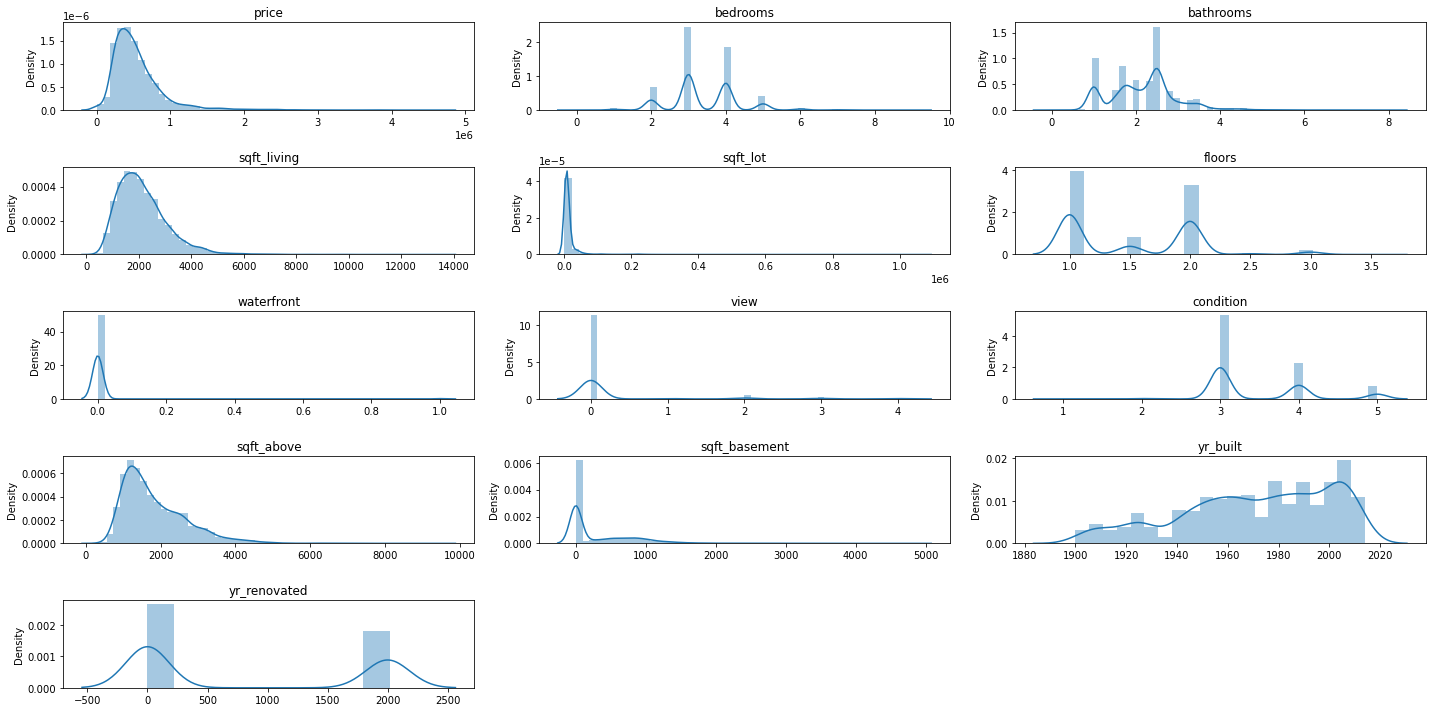

In [75]:
# Checking the distribution of numerical attributes
fig = plt.figure(figsize=(20,10))
i = 1
for feature in numerical_attributes:    
    data = df.copy()
    fig.add_subplot(5,3,i)
    sns.distplot(x=data[feature])
    plt.title(feature)
    i+=1
plt.tight_layout()    

From the Plots we can see the distribution of attributes and categorise the numerical attributes to continuous and discrete features:
- Continuous Attributes:                                      
    - price
    - sqft_living
    - sqft_lot
    - sqft_above
    - sqft_basement
    - yr_built
    - yr_renovated
- Discrete Attributes :
    - bedrooms
    - bathrooms
    - floors
    - waterfront
    - view
    - condition
   
 


In [12]:
# Continuous Attributes
continuous_attributes = [feature for feature in numerical_attributes if len(df[feature].unique()) > 30] 
                                                                      
continuous_attributes

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

In [13]:
#Discrete Attributes
discrete_attributes = [feature for feature in numerical_attributes 
                       if feature not in continuous_attributes ]
discrete_attributes

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition']

# 3) Removing the attributes - date, street and country

In [14]:
df.drop(labels= ['date','street','country'],axis = 1,inplace = True)


In [15]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119


## Relationship Analysis

Plotting Discrete attributes with price

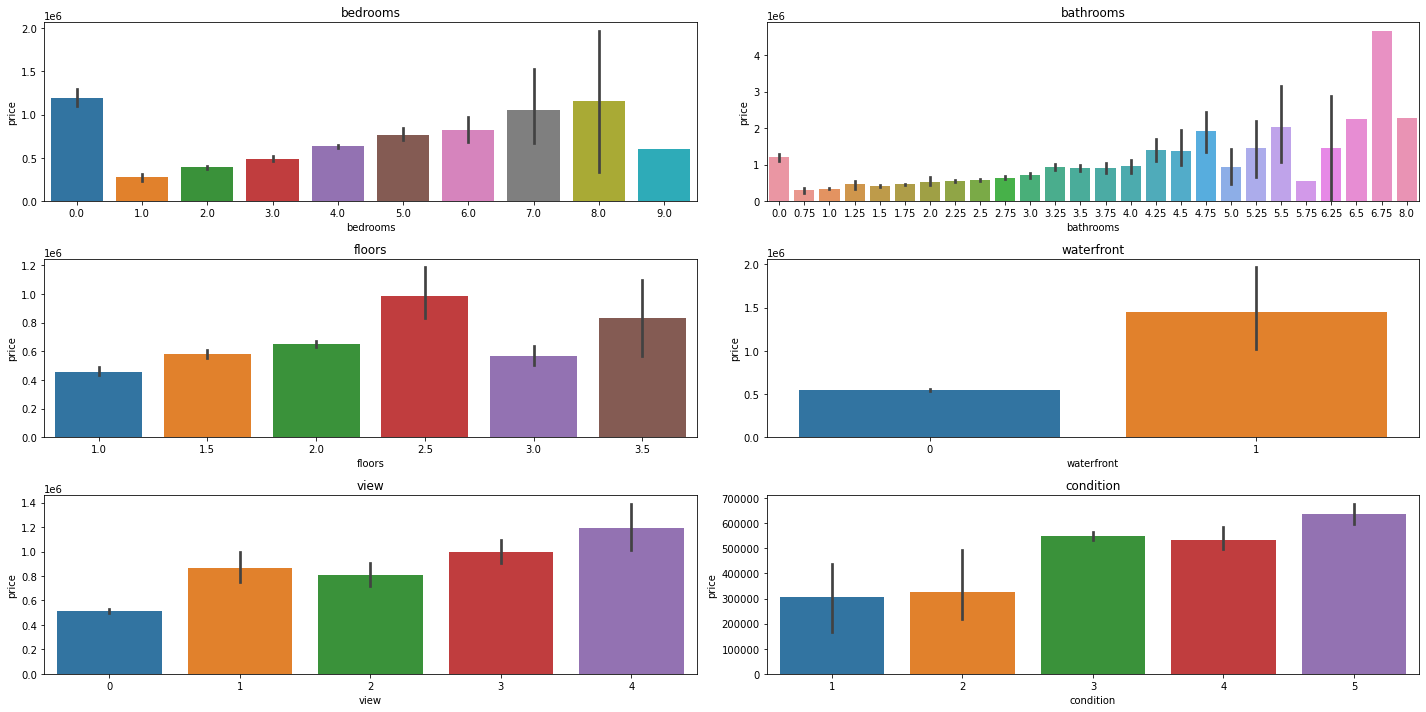

In [16]:
# Analysing the discrete attributes with price
fig = plt.figure(figsize=(20,10))
i = 1
for feature in discrete_attributes:    
    data = df.copy()
    fig.add_subplot(3,2,i)
    sns.barplot(x= data[feature], y=data['price'])
    plt.title(feature)
    i+=1
plt.tight_layout()    
    

Few observations can be made from the plots:
- With the increase in the number of bedrooms the price is increasing , but when its more than 8 bedrooms the price drops
- Price of the 2 floor housing are comparitively high
- Houses with waterfront are priced more
- With better view and condition the price in increasing

  Plotting Continuous attributes with price

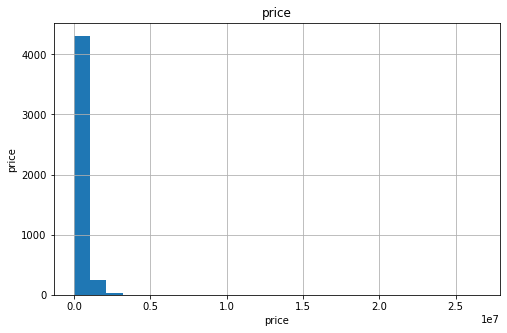

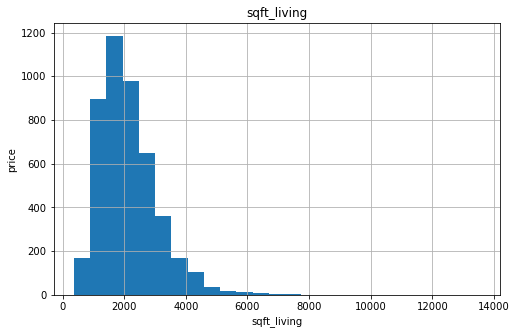

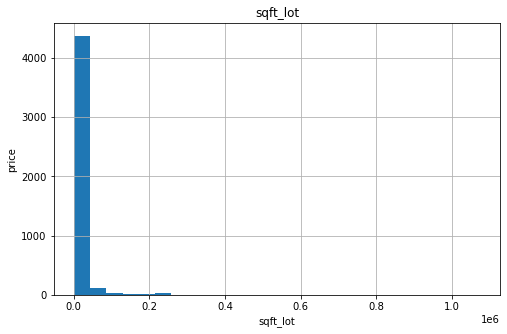

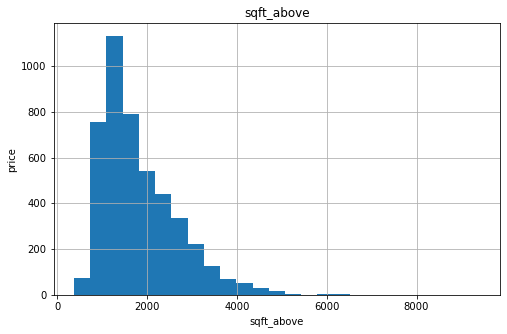

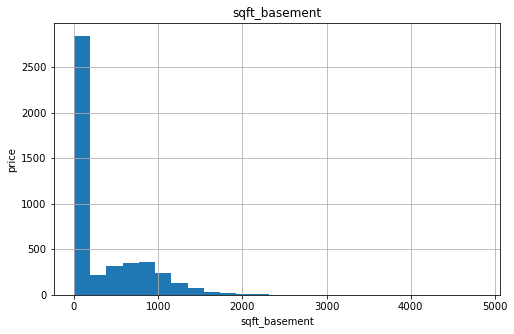

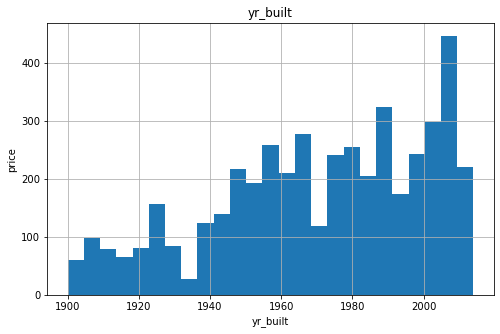

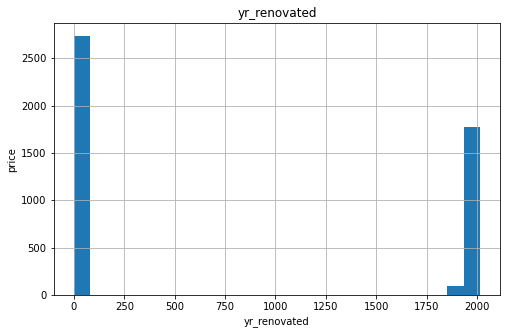

<Figure size 576x360 with 0 Axes>

In [17]:
# Analysing the continuous attributes with price
for feature in continuous_attributes:
    data = df.copy()
    data[feature].hist(bins = 25) 
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()
    
plt.tight_layout() 

Understanding the most relative attributes hich have good coreltion with the target

In [18]:
corelation = df.corr()

<AxesSubplot:>

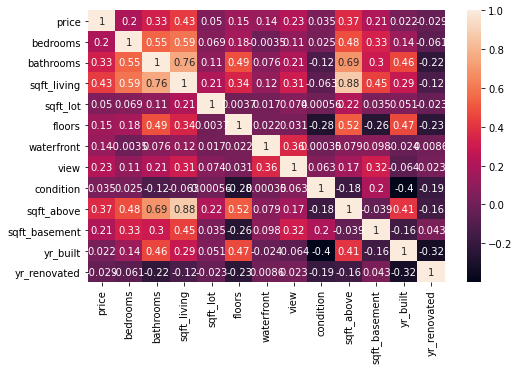

In [19]:
sns.heatmap(corelation,xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True )

Price is related more by bathrooms, sqft_living , sqft_above when compared to other attributes

<AxesSubplot:xlabel='price', ylabel='Density'>

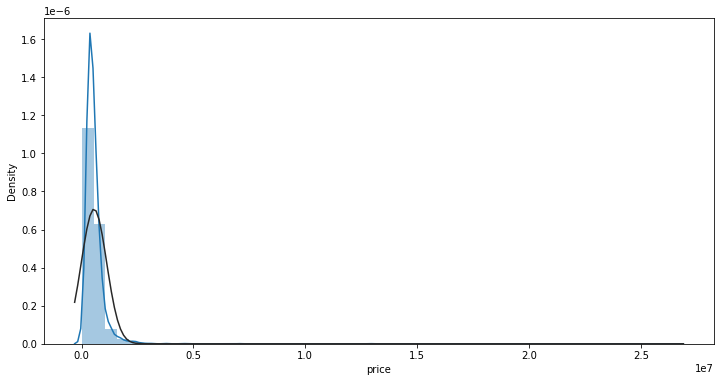

In [20]:
plt.subplots(figsize=(12,6))
sns.distplot(df['price'], fit=norm )

From the plot, we can see the price is positively skewed and is deviating from normal distribution

Finding the Skewness of price :

In [21]:
print(df['price'].skew())

24.790932561757053


## Checking for Outliers :

<AxesSubplot:xlabel='price'>

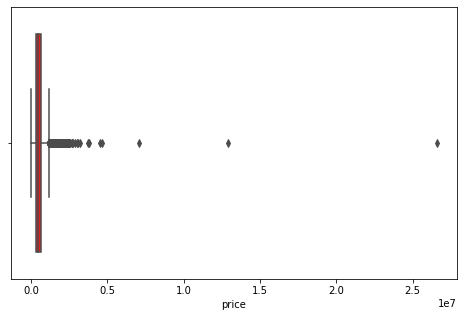

In [22]:
# Price Outliers
sns.boxplot(data=df,x = df['price'], color = 'red')

We can see outliers in price which needs to be removed to get more accurate prediction

In [23]:
df.drop(index=df[df['price'] > 6 * 10**6].index, axis = 0,inplace = True )
df.price.count()

4597

<AxesSubplot:xlabel='price'>

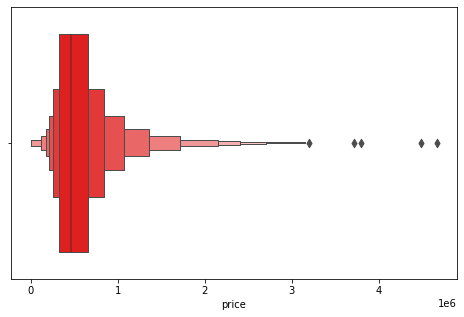

In [24]:
# Price Outliers are removed tfor better accuracy
sns.boxenplot(data=df,x = df['price'], color = 'red')

# 4) Statistical values of attributes

In [25]:
df.describe().style.background_gradient(cmap = 'Blues')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000
mean,542196.703715,3.400696,2.160268,2137.825973,14849.915597,1.512182,0.006961,0.240374,3.451816,1826.193387,311.632586,1970.791603,808.265390
std,357930.138541,0.908800,0.783257,956.341251,35894.427900,0.538310,0.083151,0.778210,0.677337,858.055014,463.256588,29.735637,979.345641
min,0.000000,0.000000,0.000000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,322500.000000,3.000000,1.750000,1460.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,460000.000000,3.000000,2.250000,1980.000000,7683.000000,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,653000.000000,4.000000,2.500000,2620.000000,11000.000000,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,4668000.000000,9.000000,8.000000,13540.000000,1074218.000000,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Observations:
- There are houses with price = 0 in dataset which need to be altered
- There are houses with no bedrooms or bathrooms
- The Condtion of the houses is marked from 1-5 , 1 being the least and 5 being the highest
- No renovation is done to few of the houses
- The Year Renovated is 0 for some data
- Year attributes are in the format of Int64 which needs to be changed to Date time format
- All the State zip values has a combination of charaters ("WA") and the zip code , which we can use the zip code directly by     removing the "WA" as its common for all the data
    

## 5) Creating Function for Mean and Median :


In [26]:
# Number of Zero price houses
df_zph = df[df ['price'] == 0]
print(f"Total number of zero price houses are : {df_zph['price'].count()}")

Total number of zero price houses are : 49


As we have seen that , there are 49 zero price houses in the data set, we can create a dataset with non-zero prices 

In [27]:
# Deleting the Zero price records and creating a new dataset
df_nzh = df[~df.isin(df_zph)].dropna()

In [28]:
print(f"Total number of Non-zero price houses are : {df_nzh['price'].count()}")

Total number of Non-zero price houses are : 4548


In [29]:
df_nzh.tail(2)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
4598,203400.0,4.0,2.0,2090.0,6630.0,1.0,0.0,0.0,3.0,1070.0,1020.0,1974.0,0.0,Seattle,WA 98178
4599,220600.0,3.0,2.5,1490.0,8102.0,2.0,0.0,0.0,4.0,1490.0,0.0,1990.0,0.0,Covington,WA 98042


In [30]:
#sum(int(list(df_nzh['price'])))

df_nzh.price

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4548, dtype: float64

## Mean Function

In [31]:
# Mean Function
def mean_price(nz_price):
    return nz_price.sum()/nz_price.count()

print(f"The Mean of the Non-zero Pricing values is : {mean_price(df_nzh['price'])}")   

The Mean of the Non-zero Pricing values is : 548038.31287968


In [32]:
print(f"The mean using inbuilt funcion is : {df_nzh['price'].mean()}")

The mean using inbuilt funcion is : 548038.31287968


## Median Function

In [33]:
def median_price(nz_price):
    #sort the elements
    sorted_nz_price = sorted(nz_price)
    count =  nz_price.count()
    med = sorted_nz_price[count//2]
    
    #check if it has even or odd number of elements
    if count % 2 == 0 :
        med2 = sorted_nz_price[count//2 - 1]
        median = (med + med2) / 2
    else:
        median = med
    
    return median

print(f"The Median of the Non-zero Pricing values is :{median_price(df_nzh['price'])}")     

The Median of the Non-zero Pricing values is :465000.0


In [34]:
print(f"The Median using inbuilt funcion is : {df_nzh['price'].median()}")

The Median using inbuilt funcion is : 465000.0


## 6) Creating instances of Datasets :

In [35]:
# Instance - 1 : Data set with all non-zero price houses
# As i have already framed the dataset with zero housing prices, i will be using it
df_nzh = df[~df.isin(df_zph)].dropna()

In [36]:
# Instance - 2 : Data set with replced values of median price in place of zero price
df_med = df.copy()

df_med['price'] = df_med['price'].apply(lambda x : median_price(df_nzh['price']) if x == 0 else x )


In [37]:
# Instance - 3 : Data set with replced values of mean price in place of zero price
df_mean = df.copy()

df_mean['price'] = df_mean['price'].apply(lambda x : mean_price(df_nzh['price']) if x == 0.00 else x )


In [38]:
df_nzh.describe().style.background_gradient(cmap = 'Blues')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000
mean,548038.312880,3.394459,2.154464,2130.830255,14832.640721,1.512313,0.006376,0.234389,3.449428,1821.134785,309.695471,1970.801011,808.217458
std,355376.495727,0.904542,0.775808,948.940535,35974.206089,0.538553,0.079606,0.765161,0.675267,850.245157,461.090009,29.763916,979.351838
min,7800.000000,0.000000,0.000000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,326075.000000,3.000000,1.750000,1460.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,465000.000000,3.000000,2.250000,1970.000000,7680.000000,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,657200.000000,4.000000,2.500000,2610.000000,10964.000000,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,4668000.000000,9.000000,8.000000,13540.000000,1074218.000000,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Removing zero entries should raise the minimum, replacing with median should lower the mean (since median is lower than mean for price), and replacing with mean should raise the median.


In [39]:
df_zph.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
4354,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,Federal Way,WA 98001
4356,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,Seattle,WA 98199
4357,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,Burien,WA 98146


Checking if the datasets have the replaced values of mean and median :

In [40]:
# Replaced with Median values where there is zero price 
df_med.iloc[4354:4358]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
4357,465000.000000,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,Burien,WA 98146
4358,465000.000000,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,Issaquah,WA 98075
4359,439333.333333,3.0,3.50,3020,4082,2.0,0,0,3,2080,940,1954,2004,Seattle,WA 98199
4360,280000.000000,3.0,2.25,1970,11088,1.0,0,0,4,1180,790,1967,0,Lake Forest Park,WA 98155


In [41]:
df_med[df_med['price'] == 0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip


All the zero prices are replaced with median in df_med dataframe

In [42]:
# Replaced with Median values where there is zero price 
df_mean.iloc[4354:4358]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
4357,548038.312880,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,Burien,WA 98146
4358,548038.312880,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,Issaquah,WA 98075
4359,439333.333333,3.0,3.50,3020,4082,2.0,0,0,3,2080,940,1954,2004,Seattle,WA 98199
4360,280000.000000,3.0,2.25,1970,11088,1.0,0,0,4,1180,790,1967,0,Lake Forest Park,WA 98155


In [43]:
df_mean[df_mean['price'] == 0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip


All the zero prices are replaced with mean in df_mean dataframe

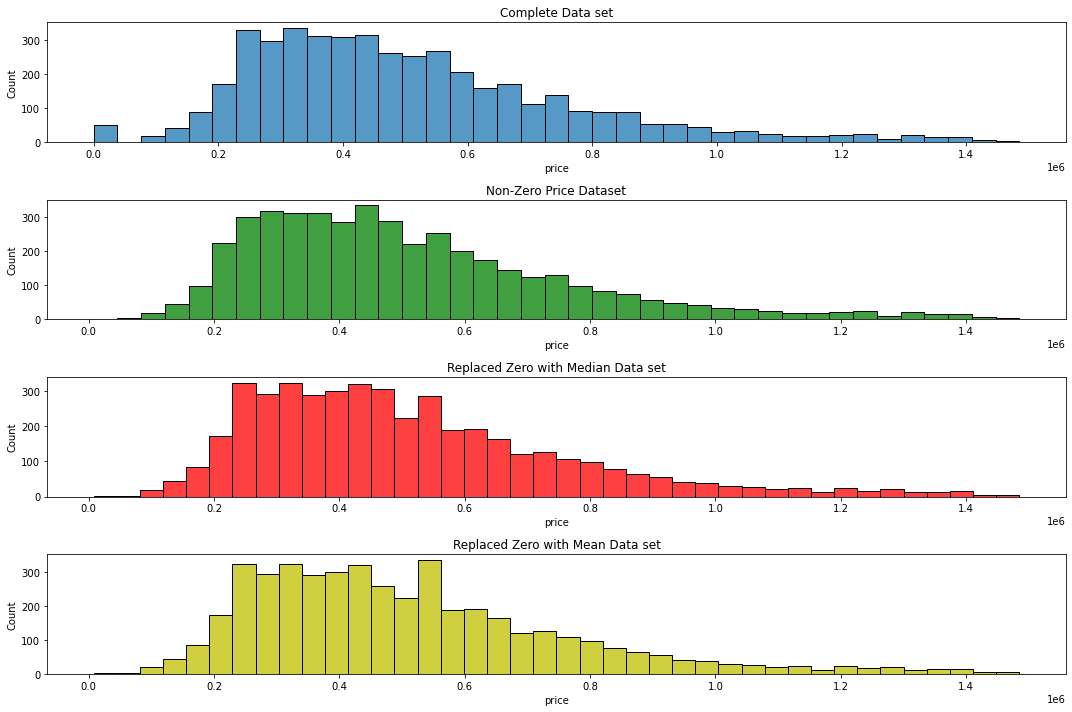

In [44]:
# Histogram plots for the four instaces of datasets considered:

fig1 = plt.figure(figsize=(15,10))

#Considering a portion of data to view the plot
x1 = df[df['price'] < 1500000]['price']
x2 = df_nzh[df_nzh['price'] < 1500000]['price']
x3 = df_med[df_med['price'] < 1500000]['price']
x4 = df_mean[df_mean['price'] < 1500000]['price']


# Complete Data set
fig1.add_subplot(4,1,1)
ax = sns.histplot(x1)
ax.set(title = 'Complete Data set')

# Non-Zero Price Dataset
fig1.add_subplot(4,1,2)
ax = sns.histplot(x2, color = 'g')
ax.set(title = 'Non-Zero Price Dataset')

# Replaced Zero with Median Data set
fig1.add_subplot(4,1,3)
ax = sns.histplot(x3, color = 'r')
ax.set(title = 'Replaced Zero with Median Data set')

# Replaced Zero with Mean Data set
fig1.add_subplot(4,1,4)
ax = sns.histplot(x4, color = 'y')
ax.set(title = 'Replaced Zero with Mean Data set')

plt.tight_layout()

## 7) Dependency of Target on each Continuous valued features :


Out of all the numerical features, we can categorise the following as continuous and Discrete :


In [45]:
# Continuous Features:
# Setting a cap of 30 to categorise the discrete and continuous attributes
continuous_attributes = [feature for feature in numerical_attributes if len(df[feature].unique()) > 30]

# Discrete Features:
discrete_attributes = [feature for feature in numerical_attributes 
                       if feature not in continuous_attributes ]


print(f"Continuous attributes in Dataset : \n{continuous_attributes}\n")
print('*' * 40)
print(f"Discrete attributes in Dataset : \n{discrete_attributes}")


Continuous attributes in Dataset : 
['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

****************************************
Discrete attributes in Dataset : 
['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition']


## Non-Zero Data Set:


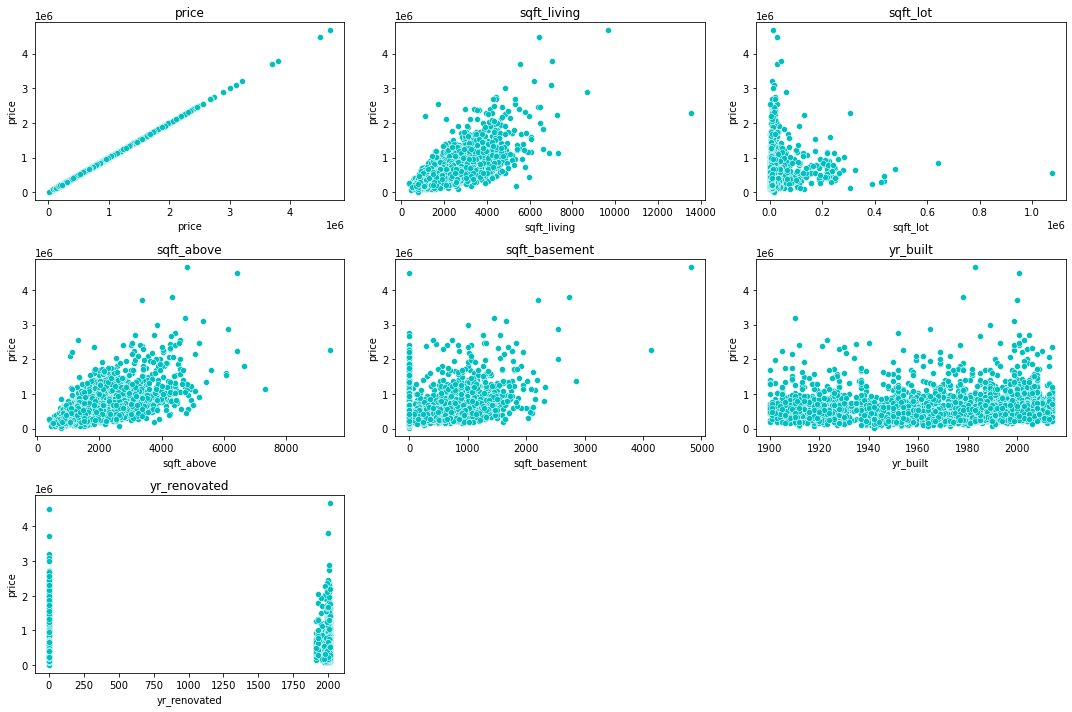

In [46]:
# Analysing the Continuous attributes with price
fig2 = plt.figure(figsize=(15,10))
i = 1
for feature in continuous_attributes:    
    data = df_nzh.copy()
    fig2.add_subplot(3,3,i)
    sns.scatterplot(x= data[feature], y=data['price'], color = 'c')
    plt.title(feature)
    i+=1
plt.tight_layout() 

## Replaced Zero price with Median -  Dataset:

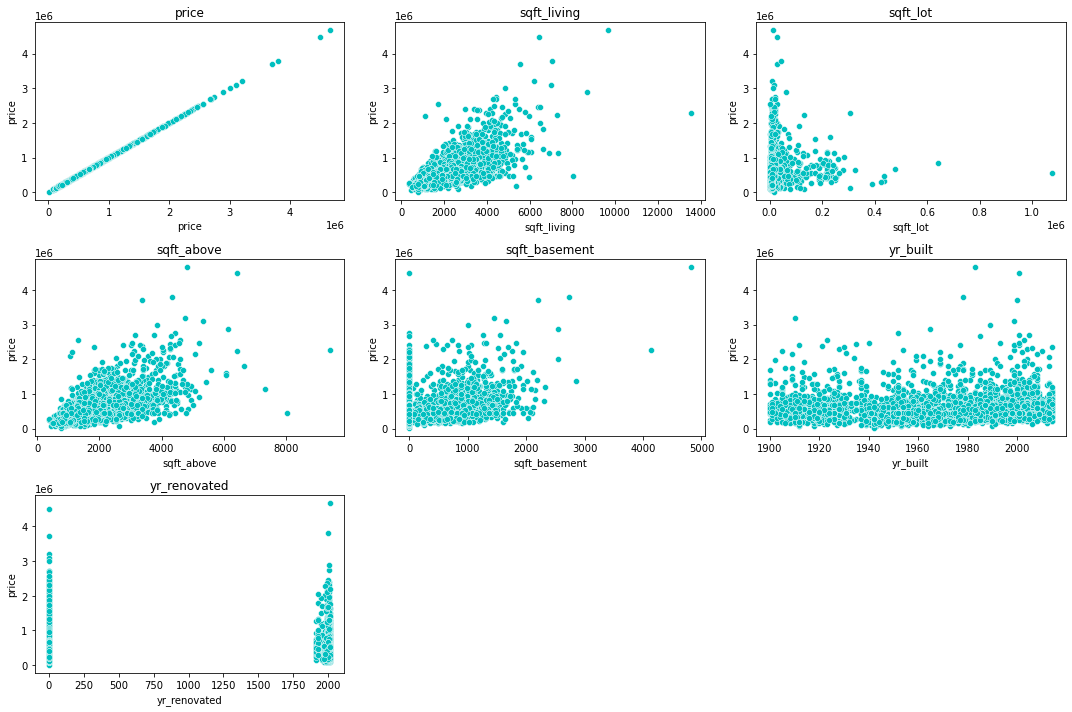

In [47]:
# Analysing the Continuous attributes with price
fig2 = plt.figure(figsize=(15,10))
i = 1
for feature in continuous_attributes:    
    data = df_med.copy()
    fig2.add_subplot(3,3,i)
    sns.scatterplot(x= data[feature], y=data['price'], color = 'c')
    plt.title(feature)
    i+=1
plt.tight_layout() 

## Replaced Zero price with Mean -  Dataset:

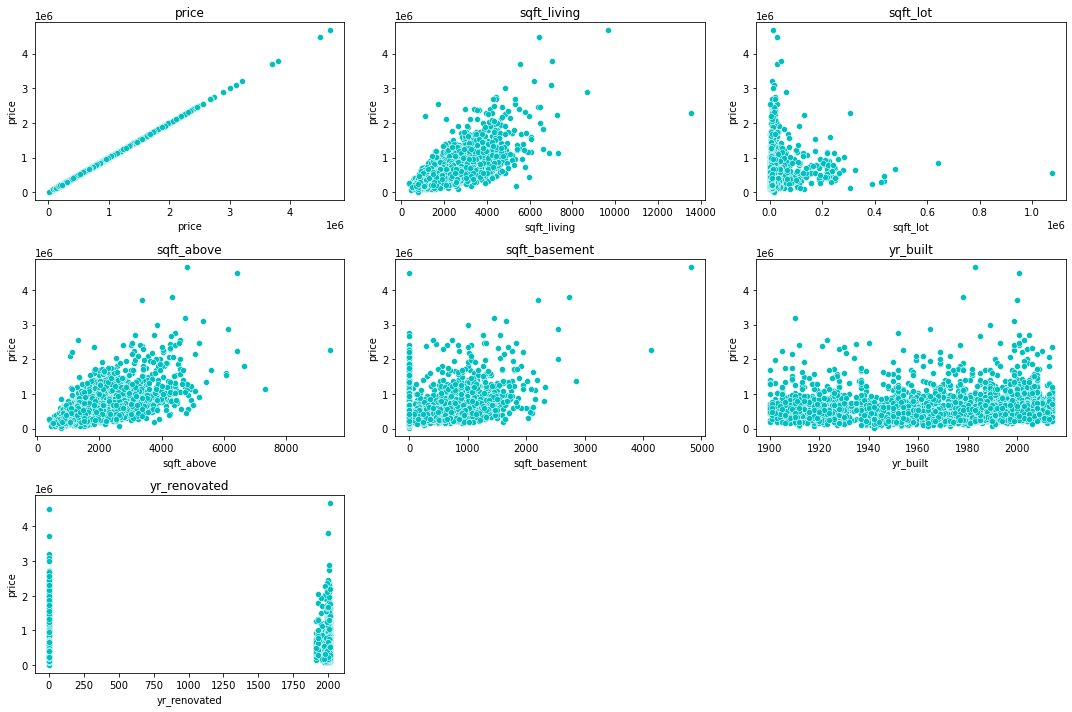

In [48]:
# Analysing the Continuous attributes with price
fig2 = plt.figure(figsize=(15,10))
i = 1
for feature in continuous_attributes:    
    data = df_nzh.copy()
    fig2.add_subplot(3,3,i)
    sns.scatterplot(x= data[feature], y=data['price'], color = 'c')
    plt.title(feature)
    i+=1
plt.tight_layout() 

**Observations :**
The Continuous valued attributes which show correlation with target according to the plots are -
- sqft_living
- sqft_above
- sqft_basement



## 8) Correlation Coefficient Function 

In [49]:
# Correlation coefficient function
def Corr_coeff(x,y):     
    mean_x, mean_y = 0,0 
    # Calculating the mean for x and y variables
    for i , j in zip (x,y):
        mean_x += i
        mean_y += j
    mean_x /= x.count()
    mean_y /= y.count()
    
    num , den_x ,den_y = 0 , 0 , 0    
    for i,j in zip(x,y):
        num += (i - mean_x) * (j - mean_y)
        den_x += (i - mean_x)**2
        den_y += (j- mean_y)**2
    return num / (den_x**(1/2) * den_y**(1/2))

## Instance 1 : ( With Zero Dataset )

In [50]:
# Getting the Correaltion Coefficient with respect to the Target:

## Instance 1 : ( With Zero Dataset )
corr_series = {}
df_cor = pd.DataFrame()
df_cor1 = pd.DataFrame()

for features in numerical_attributes:
    data = df.copy()
    target = data['price']    
    corr_series[features] = [Corr_coeff(target, data[features])]      
    df_cor = pd.concat([df_cor , pd.DataFrame(corr_series,columns= [features],index = ['Inst-1(Zero_DS)'])],axis=1)

df_cor1 = df_cor.T.sort_values(ascending = False , by = 'Inst-1(Zero_DS)' )
df_cor1.style.background_gradient(cmap = 'Blues')

,Inst-1(Zero_DS)
price,1.000000
sqft_living,0.666064
sqft_above,0.569511
bathrooms,0.504127
view,0.358538
sqft_basement,0.320152
bedrooms,0.319129
floors,0.257352
waterfront,0.171731
sqft_lot,0.080860


## Instance 2 : ( Non - Zero Dataset )

In [51]:
# Getting the Correaltion Coefficient with respect to the Target:
corr_series = {}
df_cor = pd.DataFrame()
df_cor2 = pd.DataFrame()

for features in numerical_attributes:
    data = df_nzh.copy()
    target = data['price']    
    corr_series[features] = [Corr_coeff(target, data[features])]      
    df_cor = pd.concat([df_cor , pd.DataFrame(corr_series,columns= [features],index = ['Inst-2(NON-ZERO_DS)'])],axis=1)

df_cor2 = df_cor.T.sort_values(ascending = False , by = 'Inst-2(NON-ZERO_DS)' )
df_corr = pd.concat([df_cor1,df_cor2],axis=1)
df_corr.style.background_gradient(cmap = 'Blues')

,Inst-1(Zero_DS),Inst-2(NON-ZERO_DS)
price,1.000000,1.000000
sqft_living,0.666064,0.694739
sqft_above,0.569511,0.594288
bathrooms,0.504127,0.529689
view,0.358538,0.383297
sqft_basement,0.320152,0.333939
bedrooms,0.319129,0.337051
floors,0.257352,0.261500
waterfront,0.171731,0.193942
sqft_lot,0.080860,0.082877


## Instance 3 : ( Median Dataset )

In [52]:
# Getting the Correaltion Coefficient with respect to the Target:
corr_series = {}
df_cor = pd.DataFrame()
df_cor3 = pd.DataFrame()

for features in numerical_attributes:
    data = df_med.copy()
    target = data['price']    
    corr_series[features] = [Corr_coeff(target, data[features])]      
    df_cor = pd.concat([df_cor , pd.DataFrame(corr_series,columns= [features],index = ['Inst-3(Median)'])],axis=1)

df_cor3 = df_cor.T.sort_values(ascending = False , by = 'Inst-3(Median)')
df_corr = pd.concat([df_cor1,df_cor2,df_cor3],axis=1)
df_corr.style.background_gradient(cmap = 'Blues')

,Inst-1(Zero_DS),Inst-2(NON-ZERO_DS),Inst-3(Median)
price,1.000000,1.000000,1.000000
sqft_living,0.666064,0.694739,0.683779
sqft_above,0.569511,0.594288,0.584191
bathrooms,0.504127,0.529689,0.519973
view,0.358538,0.383297,0.372959
sqft_basement,0.320152,0.333939,0.329533
bedrooms,0.319129,0.337051,0.331986
floors,0.257352,0.261500,0.260201
waterfront,0.171731,0.193942,0.182994
sqft_lot,0.080860,0.082877,0.082481


## Instance 4 : ( Mean Dataset )

In [53]:
# Getting the Correaltion Coefficient with respect to the Target:
corr_series = {}
df_cor = pd.DataFrame()
df_cor4 = pd.DataFrame()

for features in numerical_attributes:
    data = df_mean.copy()
    target = data['price']    
    corr_series[features] = [Corr_coeff(target, data[features])]      
    df_cor = pd.concat([df_cor , pd.DataFrame(corr_series,columns= [features],index = ['Inst-4(Mean)'])],axis=1)

df_cor4 = df_cor.T.sort_values(ascending = False , by = 'Inst-4(Mean)')
df_corr = pd.concat([df_cor1,df_cor2,df_cor3,df_cor4],axis=1)
df_corr.style.background_gradient(cmap = 'Blues')

,Inst-1(Zero_DS),Inst-2(NON-ZERO_DS),Inst-3(Median),Inst-4(Mean)
price,1.000000,1.000000,1.000000,1.000000
sqft_living,0.666064,0.694739,0.683779,0.685678
sqft_above,0.569511,0.594288,0.584191,0.585731
bathrooms,0.504127,0.529689,0.519973,0.521847
view,0.358538,0.383297,0.372959,0.374855
sqft_basement,0.320152,0.333939,0.329533,0.330601
bedrooms,0.319129,0.337051,0.331986,0.333678
floors,0.257352,0.261500,0.260201,0.260220
waterfront,0.171731,0.193942,0.182994,0.184682
sqft_lot,0.080860,0.082877,0.082481,0.082617


**Observations:**
- The correlation coefficient is more for the Non-zero dataset compared to all other datasets
- We can see that - sqft_living, sqft_above, sqft_basement are correlated with target and we can also see that bathrooms and view are also having a good correlation coefficient with price
- The difference between linear correlations for mean/median replacement is negligible.

## 9) One-Hot Encoding :

In [54]:
categorical_attributes

['date', 'street', 'city', 'statezip', 'country']

As we can see that, out of the 5 categorical attributes we have removed 3 of the attributes and left with :
   - city
   - statezip

**Observations:**
- The city and statezip needs to be one hot encoded
- Waterfront, view and condition are ordinal attributes and their entries are already numerical and ordered - giving key information, that would otherwise be lost.
- Tried to keep the dimensionality of predictors and repsonses as small as possible so that the difficulty of future training is also minimized. This is inspired by the well-studied "Curse of Dimensionality" phenomena in ML.


In [55]:
onehot_features = ["city", "statezip"]
data_frames_ohe = []
# Dataframes of the four instances
data_frames = [df,df_nzh,df_med,df_mean]
data_names = ["Original", "$0 Priced Homes Removed", "Median Replaced", "Mean Replaced"]
for frame, name in zip(data_frames, data_names):
    onehot_frame = pd.DataFrame(OneHotEncoder(sparse = False).fit_transform(frame[onehot_features]))
    onehot_frame.index = frame.index
    frame_temp = frame.copy()
    frame_temp.drop(onehot_features,axis = 1,inplace = True)
    onehot_frame = pd.concat([frame_temp,onehot_frame],axis = 1)
    data_frames_ohe.append(onehot_frame)

In [56]:
data_frames_ohe[0].isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
              ..
116            0
117            0
118            0
119            0
120            0
Length: 134, dtype: int64

In [57]:
# Checking the Dataframe after One-hot Encoding
data_frames_ohe[0].head().style.set_caption(data_names[0]+" - Dataframe with One-hot Encoding")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120
0,313000.000000,3.000000,1.500000,1340,7912,1.500000,0,0,3,1340,0,1955,2005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2384000.000000,5.000000,2.500000,3650,9050,2.000000,0,4,5,3370,280,1921,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,342000.000000,3.000000,2.000000,1930,11947,1.000000,0,0,4,1930,0,1966,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4200

## 10) Normalization and Standardization:

In [58]:
continuous_attributes

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

Removing the Year attributes from the continuous features, to normalise and standardise the rest of the features


In [59]:
cont_features = [x for x in continuous_attributes if x not in ['yr_built', 'yr_renovated']]
cont_features

['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

In [60]:
#List of Dataframes for all instances 
minmax_frames = []
minmax_scalers = []
zscore_frames = []
zscore_scalers = []
for frame, name in zip(data_frames_ohe, data_names):
    iterating_frame = pd.DataFrame()
    minmax_feature_scaler_map = {}
    zscore_feature_scaler_map = {}
    minmax_data = []
    zscore_data = []
    for feature in cont_features:
        scaler = MinMaxScaler().fit(frame[feature].to_numpy().reshape(-1, 1))
        minmax_data.append(scaler.transform(frame[feature].to_numpy().reshape(-1, 1)))
        minmax_feature_scaler_map[feature] = scaler
        scaler = StandardScaler().fit(frame[feature].to_numpy().reshape(-1, 1))
        zscore_data.append(scaler.transform(frame[feature].to_numpy().reshape(-1, 1)))
        zscore_feature_scaler_map[feature] = scaler
    iterating_frame = pd.DataFrame(np.concatenate(minmax_data, axis=1), columns=cont_features)
    iterating_frame.index = frame.index
    minmax_frames.append(pd.concat([iterating_frame,frame.drop(cont_features, axis=1)],axis = 1))
    iterating_frame = pd.DataFrame(np.concatenate(zscore_data, axis=1), columns=cont_features)
    iterating_frame.index = frame.index
    zscore_frames.append(pd.concat([iterating_frame,frame.drop(cont_features, axis=1)],axis = 1))
    minmax_scalers.append(minmax_feature_scaler_map)
    zscore_scalers.append(zscore_feature_scaler_map)
    


In [61]:
# Checking the Dataframe after Normalization
minmax_frames[0].head().style.set_caption(data_names[0]+" - Dataframe (Continuous Attributes) with Normalization")

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,yr_renovated,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120
0,0.067052,0.073652,0.006775,0.107301,0.000000,3.000000,1.500000,1.500000,0,0,3,1955,2005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.510711,0.249051,0.007835,0.331858,0.058091,5.000000,2.500000,2.000000,0,4,5,1921,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.073265,0.118451,0.010534,0.172566,0.000000,3.000000,2.000000,1.000000,0,0,4,1966,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [62]:
zscore_frames[0].head().style.set_caption(data_names[0]+" - Dataframe (Continuous Attributes) with standardization")

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,yr_renovated,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120
0,-0.640409,-0.834339,-0.193308,-0.566684,-0.672773,3.000000,1.500000,1.500000,0,0,3,1955,2005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.146266,1.581380,-0.161600,1.799389,-0.068291,5.000000,2.500000,2.000000,0,4,5,1921,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.559379,-0.217337,-0.080883,0.120992,-0.672773,3.000000,2.000000,1.000000,0,0,4,1966,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [63]:
for frame, name in zip(minmax_frames, data_names):
    display(frame.describe().style.background_gradient(cmap = 'Blues'))

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,yr_renovated,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120
count,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000
mean,0.116152,0.134231,0.013238,0.161083,0.064654,3.400696,2.160268,1.512182,0.006961,0.240374,3.451816,1970.791603,808.265390,0.001088,0.038286,0.000218,0.061997,0.001958,0.007179,0.016097,0.004786,0.002393,0.009354,0.012617,0.009136,0.006091,0.002393,0.032195,0.000218,0.040679,0.014357,0.040026,0.040679,0.007831,0.020883,0.002393,0.018708,0.000435,0.007179,0.003916,0.010877,0.001305,0.000435,0.001523,0.051120,0.063737,0.038068,0.006308,0.341962,0.026757,0.000653,0.015445,0.000218,0.006308,0.006308,0.025016,0.000870,0.014575,0.007831,0.010442,0.015880,0.006308,0.023929,0.008484,0.010877,0.001958,0.006961,0.004786,0.009136,0.006091,0.020666,0.002393,0.020666,0.014575,0.019143,0.008919,0.014140,0.004568,0.019360,0.021536,0.020883,0.002393,0.018708,0.021753,0.010877,0.001305,0.000435,0.001523,0.029367,0.021318,0.006091,0.018055,0.003045,0.020666,0.023059,0.015445,0.000218,0.006308,0.013705,0.021318,0.018055,0.011312,0.018055,0.005003,0.032195,0.010659,0.014357,0.012617,0.010007,0.006526,0.015010,0.028279,0.014140,0.028714,0.017185,0.010659,0.014357,0.019360,0.016968,0.020231,0.012399,0.017403,0.011747,0.003481,0.019143,0.012834,0.014575,0.011529,0.010659,0.005003,0.012182,0.014575,0.000653,0.000435
std,0.076677,0.072615,0.033434,0.094918,0.096111,0.908800,0.783257,0.538310,0.083151,0.778210,0.677337,29.735637,979.345641,0.032965,0.191906,0.014749,0.241176,0.044208,0.084431,0.125864,0.069021,0.048864,0.096273,0.111626,0.095157,0.077815,0.048864,0.176537,0.014749,0.197566,0.118971,0.196042,0.197566,0.088156,0.143009,0.048864,0.135506,0.020856,0.084431,0.062459,0.103734,0.036108,0.020856,0.038997,0.220267,0.244311,0.191382,0.079184,0.474419,0.161389,0.025540,0.123327,0.014749,0.079184,0.079184,0.156192,0.029488,0.119856,0.088156,0.101660,0.125025,0.079184,0.152844,0.091726,0.103734,0.044208,0.083151,0.069021,0.095157,0.077815,0.142278,0.048864,0.142278,0.119

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,yr_renovated,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120
count,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000
mean,0.115926,0.133700,0.013222,0.160524,0.064252,3.394459,2.154464,1.512313,0.006376,0.234389,3.449428,1970.801011,808.217458,0.001099,0.038478,0.000220,0.061566,0.001759,0.007256,0.015831,0.004837,0.001979,0.009235,0.012753,0.009235,0.005937,0.002419,0.031882,0.000220,0.040897,0.014292,0.040237,0.041117,0.007476,0.020888,0.002419,0.018030,0.000440,0.007256,0.003738,0.010994,0.001319,0.000440,0.001539,0.051671,0.063984,0.037599,0.006157,0.343008,0.027045,0.000660,0.015172,0.000220,0.006376,0.006376,0.025066,0.000880,0.014512,0.007696,0.010554,0.015391,0.006376,0.023967,0.008355,0.010554,0.001759,0.007036,0.004837,0.009235,0.005937,0.020449,0.002419,0.020888,0.014512,0.019349,0.009015,0.014292,0.004617,0.019569,0.021768,0.020888,0.002419,0.018030,0.021548,0.010994,0.001319,0.000440,0.001539,0.029683,0.021548,0.006157,0.017810,0.003078,0.020888,0.023307,0.015172,0.000220,0.006376,0.013852,0.020668,0.018030,0.011214,0.018250,0.005057,0.032542,0.010554,0.014512,0.012753,0.009675,0.006596,0.015172,0.028364,0.014072,0.029024,0.017370,0.010774,0.014512,0.019349,0.017150,0.020449,0.012313,0.017590,0.011653,0.003518,0.018909,0.012533,0.014512,0.011434,0.010334,0.004837,0.012313,0.014512,0.000660,0.000440
std,0.076258,0.072053,0.033509,0.094054,0.095662,0.904542,0.775808,0.538553,0.079606,0.765161,0.675267,29.763916,979.351838,0.033142,0.192369,0.014828,0.240391,0.041908,0.084882,0.124836,0.069390,0.044446,0.095664,0.112219,0.095664,0.076829,0.049126,0.175706,0.014828,0.198074,0.118705,0.196537,0.198583,0.086148,0.143026,0.049126,0.133074,0.020968,0.084882,0.061031,0.104285,0.036302,0.020968,0.039206,0.221386,0.244752,0.190245,0.078230,0.474766,0.162232,0.025678,0.122248,0.014828,0.079606,0.079606,0.156343,0.029647,0.119601,0.087396,0.102201,0.123117,0.079606,0.152962,0.091035,0.102201,0.041908,0.083595,0.069390,0.095664,0.076829,0.141544,0.049126,0.143026,0.119

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,yr_renovated,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120
count,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000
mean,0.115736,0.134231,0.013238,0.161083,0.064654,3.400696,2.160268,1.512182,0.006961,0.240374,3.451816,1970.791603,808.265390,0.001088,0.038286,0.000218,0.061997,0.001958,0.007179,0.016097,0.004786,0.002393,0.009354,0.012617,0.009136,0.006091,0.002393,0.032195,0.000218,0.040679,0.014357,0.040026,0.040679,0.007831,0.020883,0.002393,0.018708,0.000435,0.007179,0.003916,0.010877,0.001305,0.000435,0.001523,0.051120,0.063737,0.038068,0.006308,0.341962,0.026757,0.000653,0.015445,0.000218,0.006308,0.006308,0.025016,0.000870,0.014575,0.007831,0.010442,0.015880,0.006308,0.023929,0.008484,0.010877,0.001958,0.006961,0.004786,0.009136,0.006091,0.020666,0.002393,0.020666,0.014575,0.019143,0.008919,0.014140,0.004568,0.019360,0.021536,0.020883,0.002393,0.018708,0.021753,0.010877,0.001305,0.000435,0.001523,0.029367,0.021318,0.006091,0.018055,0.003045,0.020666,0.023059,0.015445,0.000218,0.006308,0.013705,0.021318,0.018055,0.011312,0.018055,0.005003,0.032195,0.010659,0.014357,0.012617,0.010007,0.006526,0.015010,0.028279,0.014140,0.028714,0.017185,0.010659,0.014357,0.019360,0.016968,0.020231,0.012399,0.017403,0.011747,0.003481,0.019143,0.012834,0.014575,0.011529,0.010659,0.005003,0.012182,0.014575,0.000653,0.000435
std,0.075872,0.072615,0.033434,0.094918,0.096111,0.908800,0.783257,0.538310,0.083151,0.778210,0.677337,29.735637,979.345641,0.032965,0.191906,0.014749,0.241176,0.044208,0.084431,0.125864,0.069021,0.048864,0.096273,0.111626,0.095157,0.077815,0.048864,0.176537,0.014749,0.197566,0.118971,0.196042,0.197566,0.088156,0.143009,0.048864,0.135506,0.020856,0.084431,0.062459,0.103734,0.036108,0.020856,0.038997,0.220267,0.244311,0.191382,0.079184,0.474419,0.161389,0.025540,0.123327,0.014749,0.079184,0.079184,0.156192,0.029488,0.119856,0.088156,0.101660,0.125025,0.079184,0.152844,0.091726,0.103734,0.044208,0.083151,0.069021,0.095157,0.077815,0.142278,0.048864,0.142278,0.119

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,yr_renovated,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120
count,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000
mean,0.115926,0.134231,0.013238,0.161083,0.064654,3.400696,2.160268,1.512182,0.006961,0.240374,3.451816,1970.791603,808.265390,0.001088,0.038286,0.000218,0.061997,0.001958,0.007179,0.016097,0.004786,0.002393,0.009354,0.012617,0.009136,0.006091,0.002393,0.032195,0.000218,0.040679,0.014357,0.040026,0.040679,0.007831,0.020883,0.002393,0.018708,0.000435,0.007179,0.003916,0.010877,0.001305,0.000435,0.001523,0.051120,0.063737,0.038068,0.006308,0.341962,0.026757,0.000653,0.015445,0.000218,0.006308,0.006308,0.025016,0.000870,0.014575,0.007831,0.010442,0.015880,0.006308,0.023929,0.008484,0.010877,0.001958,0.006961,0.004786,0.009136,0.006091,0.020666,0.002393,0.020666,0.014575,0.019143,0.008919,0.014140,0.004568,0.019360,0.021536,0.020883,0.002393,0.018708,0.021753,0.010877,0.001305,0.000435,0.001523,0.029367,0.021318,0.006091,0.018055,0.003045,0.020666,0.023059,0.015445,0.000218,0.006308,0.013705,0.021318,0.018055,0.011312,0.018055,0.005003,0.032195,0.010659,0.014357,0.012617,0.010007,0.006526,0.015010,0.028279,0.014140,0.028714,0.017185,0.010659,0.014357,0.019360,0.016968,0.020231,0.012399,0.017403,0.011747,0.003481,0.019143,0.012834,0.014575,0.011529,0.010659,0.005003,0.012182,0.014575,0.000653,0.000435
std,0.075850,0.072615,0.033434,0.094918,0.096111,0.908800,0.783257,0.538310,0.083151,0.778210,0.677337,29.735637,979.345641,0.032965,0.191906,0.014749,0.241176,0.044208,0.084431,0.125864,0.069021,0.048864,0.096273,0.111626,0.095157,0.077815,0.048864,0.176537,0.014749,0.197566,0.118971,0.196042,0.197566,0.088156,0.143009,0.048864,0.135506,0.020856,0.084431,0.062459,0.103734,0.036108,0.020856,0.038997,0.220267,0.244311,0.191382,0.079184,0.474419,0.161389,0.025540,0.123327,0.014749,0.079184,0.079184,0.156192,0.029488,0.119856,0.088156,0.101660,0.125025,0.079184,0.152844,0.091726,0.103734,0.044208,0.083151,0.069021,0.095157,0.077815,0.142278,0.048864,0.142278,0.119

**Observations :**
- We can see that the data has been correctly converted by showing that in min-max scaling, the minimum and maximum for each     attribute is 0.0 and 1.0 respectively.

In [64]:
# Checking for the instances :
for frame, name in zip(zscore_frames, data_names):
    display(frame.describe().style.background_gradient(cmap = 'Blues'))

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,yr_renovated,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120
count,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000
mean,0.000000,-0.000000,0.000000,-0.000000,-0.000000,3.400696,2.160268,1.512182,0.006961,0.240374,3.451816,1970.791603,808.265390,0.001088,0.038286,0.000218,0.061997,0.001958,0.007179,0.016097,0.004786,0.002393,0.009354,0.012617,0.009136,0.006091,0.002393,0.032195,0.000218,0.040679,0.014357,0.040026,0.040679,0.007831,0.020883,0.002393,0.018708,0.000435,0.007179,0.003916,0.010877,0.001305,0.000435,0.001523,0.051120,0.063737,0.038068,0.006308,0.341962,0.026757,0.000653,0.015445,0.000218,0.006308,0.006308,0.025016,0.000870,0.014575,0.007831,0.010442,0.015880,0.006308,0.023929,0.008484,0.010877,0.001958,0.006961,0.004786,0.009136,0.006091,0.020666,0.002393,0.020666,0.014575,0.019143,0.008919,0.014140,0.004568,0.019360,0.021536,0.020883,0.002393,0.018708,0.021753,0.010877,0.001305,0.000435,0.001523,0.029367,0.021318,0.006091,0.018055,0.003045,0.020666,0.023059,0.015445,0.000218,0.006308,0.013705,0.021318,0.018055,0.011312,0.018055,0.005003,0.032195,0.010659,0.014357,0.012617,0.010007,0.006526,0.015010,0.028279,0.014140,0.028714,0.017185,0.010659,0.014357,0.019360,0.016968,0.020231,0.012399,0.017403,0.011747,0.003481,0.019143,0.012834,0.014575,0.011529,0.010659,0.005003,0.012182,0.014575,0.000653,0.000435
std,1.000109,1.000109,1.000109,1.000109,1.000109,0.908800,0.783257,0.538310,0.083151,0.778210,0.677337,29.735637,979.345641,0.032965,0.191906,0.014749,0.241176,0.044208,0.084431,0.125864,0.069021,0.048864,0.096273,0.111626,0.095157,0.077815,0.048864,0.176537,0.014749,0.197566,0.118971,0.196042,0.197566,0.088156,0.143009,0.048864,0.135506,0.020856,0.084431,0.062459,0.103734,0.036108,0.020856,0.038997,0.220267,0.244311,0.191382,0.079184,0.474419,0.161389,0.025540,0.123327,0.014749,0.079184,0.079184,0.156192,0.029488,0.119856,0.088156,0.101660,0.125025,0.079184,0.152844,0.091726,0.103734,0.044208,0.083151,0.069021,0.095157,0.077815,0.142278,0.048864,0.142278,0.

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,yr_renovated,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120
count,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000
mean,0.000000,0.000000,-0.000000,-0.000000,-0.000000,3.394459,2.154464,1.512313,0.006376,0.234389,3.449428,1970.801011,808.217458,0.001099,0.038478,0.000220,0.061566,0.001759,0.007256,0.015831,0.004837,0.001979,0.009235,0.012753,0.009235,0.005937,0.002419,0.031882,0.000220,0.040897,0.014292,0.040237,0.041117,0.007476,0.020888,0.002419,0.018030,0.000440,0.007256,0.003738,0.010994,0.001319,0.000440,0.001539,0.051671,0.063984,0.037599,0.006157,0.343008,0.027045,0.000660,0.015172,0.000220,0.006376,0.006376,0.025066,0.000880,0.014512,0.007696,0.010554,0.015391,0.006376,0.023967,0.008355,0.010554,0.001759,0.007036,0.004837,0.009235,0.005937,0.020449,0.002419,0.020888,0.014512,0.019349,0.009015,0.014292,0.004617,0.019569,0.021768,0.020888,0.002419,0.018030,0.021548,0.010994,0.001319,0.000440,0.001539,0.029683,0.021548,0.006157,0.017810,0.003078,0.020888,0.023307,0.015172,0.000220,0.006376,0.013852,0.020668,0.018030,0.011214,0.018250,0.005057,0.032542,0.010554,0.014512,0.012753,0.009675,0.006596,0.015172,0.028364,0.014072,0.029024,0.017370,0.010774,0.014512,0.019349,0.017150,0.020449,0.012313,0.017590,0.011653,0.003518,0.018909,0.012533,0.014512,0.011434,0.010334,0.004837,0.012313,0.014512,0.000660,0.000440
std,1.000110,1.000110,1.000110,1.000110,1.000110,0.904542,0.775808,0.538553,0.079606,0.765161,0.675267,29.763916,979.351838,0.033142,0.192369,0.014828,0.240391,0.041908,0.084882,0.124836,0.069390,0.044446,0.095664,0.112219,0.095664,0.076829,0.049126,0.175706,0.014828,0.198074,0.118705,0.196537,0.198583,0.086148,0.143026,0.049126,0.133074,0.020968,0.084882,0.061031,0.104285,0.036302,0.020968,0.039206,0.221386,0.244752,0.190245,0.078230,0.474766,0.162232,0.025678,0.122248,0.014828,0.079606,0.079606,0.156343,0.029647,0.119601,0.087396,0.102201,0.123117,0.079606,0.152962,0.091035,0.102201,0.041908,0.083595,0.069390,0.095664,0.076829,0.141544,0.049126,0.143026,0.

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,yr_renovated,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120
count,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000
mean,0.000000,-0.000000,0.000000,-0.000000,-0.000000,3.400696,2.160268,1.512182,0.006961,0.240374,3.451816,1970.791603,808.265390,0.001088,0.038286,0.000218,0.061997,0.001958,0.007179,0.016097,0.004786,0.002393,0.009354,0.012617,0.009136,0.006091,0.002393,0.032195,0.000218,0.040679,0.014357,0.040026,0.040679,0.007831,0.020883,0.002393,0.018708,0.000435,0.007179,0.003916,0.010877,0.001305,0.000435,0.001523,0.051120,0.063737,0.038068,0.006308,0.341962,0.026757,0.000653,0.015445,0.000218,0.006308,0.006308,0.025016,0.000870,0.014575,0.007831,0.010442,0.015880,0.006308,0.023929,0.008484,0.010877,0.001958,0.006961,0.004786,0.009136,0.006091,0.020666,0.002393,0.020666,0.014575,0.019143,0.008919,0.014140,0.004568,0.019360,0.021536,0.020883,0.002393,0.018708,0.021753,0.010877,0.001305,0.000435,0.001523,0.029367,0.021318,0.006091,0.018055,0.003045,0.020666,0.023059,0.015445,0.000218,0.006308,0.013705,0.021318,0.018055,0.011312,0.018055,0.005003,0.032195,0.010659,0.014357,0.012617,0.010007,0.006526,0.015010,0.028279,0.014140,0.028714,0.017185,0.010659,0.014357,0.019360,0.016968,0.020231,0.012399,0.017403,0.011747,0.003481,0.019143,0.012834,0.014575,0.011529,0.010659,0.005003,0.012182,0.014575,0.000653,0.000435
std,1.000109,1.000109,1.000109,1.000109,1.000109,0.908800,0.783257,0.538310,0.083151,0.778210,0.677337,29.735637,979.345641,0.032965,0.191906,0.014749,0.241176,0.044208,0.084431,0.125864,0.069021,0.048864,0.096273,0.111626,0.095157,0.077815,0.048864,0.176537,0.014749,0.197566,0.118971,0.196042,0.197566,0.088156,0.143009,0.048864,0.135506,0.020856,0.084431,0.062459,0.103734,0.036108,0.020856,0.038997,0.220267,0.244311,0.191382,0.079184,0.474419,0.161389,0.025540,0.123327,0.014749,0.079184,0.079184,0.156192,0.029488,0.119856,0.088156,0.101660,0.125025,0.079184,0.152844,0.091726,0.103734,0.044208,0.083151,0.069021,0.095157,0.077815,0.142278,0.048864,0.142278,0.

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,yr_renovated,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120
count,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000
mean,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,3.400696,2.160268,1.512182,0.006961,0.240374,3.451816,1970.791603,808.265390,0.001088,0.038286,0.000218,0.061997,0.001958,0.007179,0.016097,0.004786,0.002393,0.009354,0.012617,0.009136,0.006091,0.002393,0.032195,0.000218,0.040679,0.014357,0.040026,0.040679,0.007831,0.020883,0.002393,0.018708,0.000435,0.007179,0.003916,0.010877,0.001305,0.000435,0.001523,0.051120,0.063737,0.038068,0.006308,0.341962,0.026757,0.000653,0.015445,0.000218,0.006308,0.006308,0.025016,0.000870,0.014575,0.007831,0.010442,0.015880,0.006308,0.023929,0.008484,0.010877,0.001958,0.006961,0.004786,0.009136,0.006091,0.020666,0.002393,0.020666,0.014575,0.019143,0.008919,0.014140,0.004568,0.019360,0.021536,0.020883,0.002393,0.018708,0.021753,0.010877,0.001305,0.000435,0.001523,0.029367,0.021318,0.006091,0.018055,0.003045,0.020666,0.023059,0.015445,0.000218,0.006308,0.013705,0.021318,0.018055,0.011312,0.018055,0.005003,0.032195,0.010659,0.014357,0.012617,0.010007,0.006526,0.015010,0.028279,0.014140,0.028714,0.017185,0.010659,0.014357,0.019360,0.016968,0.020231,0.012399,0.017403,0.011747,0.003481,0.019143,0.012834,0.014575,0.011529,0.010659,0.005003,0.012182,0.014575,0.000653,0.000435
std,1.000109,1.000109,1.000109,1.000109,1.000109,0.908800,0.783257,0.538310,0.083151,0.778210,0.677337,29.735637,979.345641,0.032965,0.191906,0.014749,0.241176,0.044208,0.084431,0.125864,0.069021,0.048864,0.096273,0.111626,0.095157,0.077815,0.048864,0.176537,0.014749,0.197566,0.118971,0.196042,0.197566,0.088156,0.143009,0.048864,0.135506,0.020856,0.084431,0.062459,0.103734,0.036108,0.020856,0.038997,0.220267,0.244311,0.191382,0.079184,0.474419,0.161389,0.025540,0.123327,0.014749,0.079184,0.079184,0.156192,0.029488,0.119856,0.088156,0.101660,0.125025,0.079184,0.152844,0.091726,0.103734,0.044208,0.083151,0.069021,0.095157,0.077815,0.142278,0.048864,0.142278,0

**Observations :**
- For standard scaling (z-score) I verify correct conversion by showing that the mean and standard deviation (std) is approximately 0.0 and 1.0 repectively.

All the Attributes to the left of price are normalised and standardized in their respective dataframes

## 11 & 12 ) KFold Object and Mean absolute error and Mean square error

In [65]:
# function to calculate mean_absolute_error
def compute_mse(x, y):
    sq_errs = (np.reshape(x, (-1)) - np.reshape(y, (-1)))**2
    return sum(sq_errs) / len(sq_errs)

# function to calculate mean_squared_error
def compute_mae(x, y):
    abs_errs = abs(np.reshape(x, (-1)) - np.reshape(y, (-1)))
    return sum(abs_errs) / len(abs_errs)


In [66]:
frames = []
#frames += data_frames
frames += minmax_frames
frames += zscore_frames
scalers = []
scalers += minmax_scalers
scalers += zscore_scalers
names = []
#names += data_names
names += ["Min-Max " + x for x in data_names]
names += ["Z-Score " + x for x in data_names]
response_feature = 'price'
response_features = ["price"]
predictor_features = [x for x in minmax_frames[0].columns]
predictor_features.remove(response_feature)
n_folds = 10
kfold = KFold(n_splits=n_folds, random_state=123)
mses = np.zeros((len(frames), n_folds))
maes = np.zeros((len(frames), n_folds))
x = frame[predictor_features].to_numpy()
y = np.reshape(frame[response_features].to_numpy(), (-1))
i = 0
for frame, name in zip(frames, names):
    j = 0
    for train_indices, test_indices in kfold.split(frame):
        train_x = x[train_indices]
        train_y = y[train_indices]
        test_x = x[test_indices]
        test_y = y[test_indices]
        lin_reg = LinearRegression().fit(train_x, train_y)
        train_yhat = lin_reg.predict(train_x)
        test_yhat = lin_reg.predict(test_x)
        mses[i,j] = compute_mse(test_yhat, test_y)
        maes[i,j] = compute_mae(test_yhat, test_y)        
        j += 1
    #name_str = "### Dataset: \"%s\" ###" % (name)
    #print("%s\n%s\n%s" % ("#"*len(name_str), name_str, "#"*len(name_str)))
    #print("   Average MSE = %.6f" % (np.mean(mses[i,:])))
    #print("   Average MAE = %.6f" % (np.mean(maes[i,:])))
    i += 1

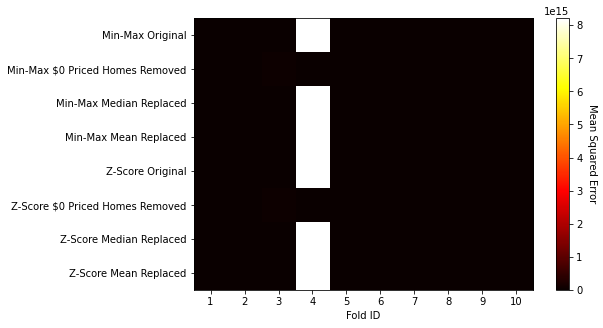

In [67]:
im = plt.imshow(mses, cmap="hot")
plt.yticks(np.arange(len(names)), names)
plt.xticks(np.arange(n_folds), np.arange(n_folds)+1)
plt.xlabel("Fold ID")
cbar = plt.colorbar(im)
cbar_label = "Mean Squared Error"
cbar.ax.set_ylabel(cbar_label, rotation=-90, va="bottom")
plt.show()
plt.close()

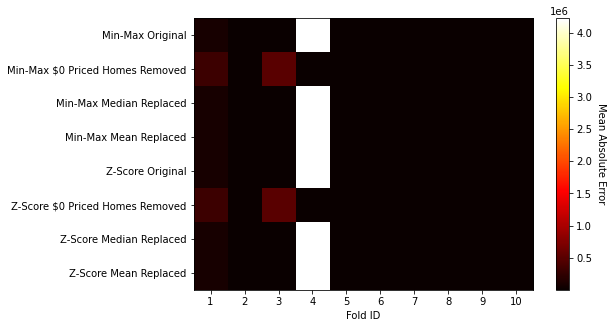

In [68]:
im = plt.imshow(maes, cmap="hot")
plt.yticks(np.arange(len(names)), names)
plt.xticks(np.arange(n_folds), np.arange(n_folds)+1)
plt.xlabel("Fold ID")
cbar = plt.colorbar(im)
cbar_label = "Mean Absolute Error"
cbar.ax.set_ylabel(cbar_label, rotation=-90, va="bottom")
plt.show()
plt.close()

In [69]:
np.random.seed(123)
i = np.random.choice(len(frames))
frame, scaler, name = frames[i], scalers[i], names[i]
x = frame[predictor_features].to_numpy()
y = np.reshape(frame[response_features].to_numpy(), (-1))
n_samples = len(x)
n_train = int(0.9 * n_samples)
n_test = n_samples - n_train
train_indices = np.random.choice(n_samples, size=n_train, replace=False)
test_indices = np.random.choice(n_samples, size=n_test, replace=False)
train_x = x[train_indices]
train_y = y[train_indices]
test_x = x[test_indices]
test_y = y[test_indices]
lin_reg = LinearRegression().fit(train_x, train_y)
train_yhat = lin_reg.predict(train_x)
test_yhat = lin_reg.predict(test_x)
print("Train Inputs =", train_x.shape, "=", train_x[0])
print("Train Outputs =", train_y.shape, "=", train_y[0])

Train Inputs = (4137, 133) = [ 1.50817599e+00 -1.54188768e-01  6.33835549e-01  1.93945464e+00
  4.00000000e+00  3.00000000e+00  2.50000000e+00  0.00000000e+00
  0.00000000e+00  3.00000000e+00  1.99100000e+03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

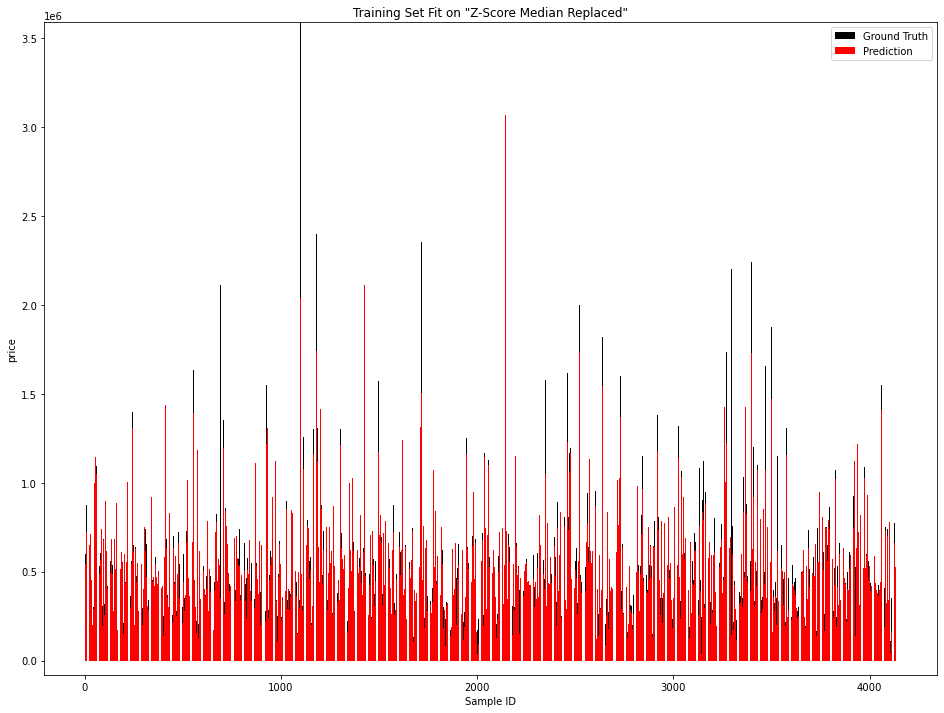

Scaled Training MSE = 0.255417
Scaled Training MAE = 0.281207
Training MSE = 31925011098.452850
Training MAE = 99418.459256


In [70]:
plt.figure(figsize=(16,12))
groundtruth = scaler[response_feature].inverse_transform(train_y.reshape(-1, 1)).reshape(-1)
prediction = scaler[response_feature].inverse_transform(train_yhat.reshape(-1, 1)).reshape(-1)
plt.bar(np.arange(n_train), groundtruth, label="Ground Truth", color="k", align="center")
plt.bar(np.arange(n_train), prediction, label="Prediction", color="r", align="center")
plt.ylabel(response_features[0])
plt.xlabel("Sample ID")
y_min = min(np.min(groundtruth), np.min(prediction))
y_max = max(np.max(groundtruth), np.max(prediction))
y_max *= 0.75
y_range = y_max - y_min
plt.ylim(y_min-0.025*y_range, y_max+0.025*y_range)
plt.legend()
plt.title("Training Set Fit on \"%s\"" % (name))
plt.show()
plt.close()
print("Scaled Training MSE = %.6f" % (compute_mse(train_yhat, train_y)))
print("Scaled Training MAE = %.6f" % (compute_mae(train_yhat, train_y)))
print("Training MSE = %.6f" % (compute_mse(prediction, groundtruth)))
print("Training MAE = %.6f" % (compute_mae(prediction, groundtruth)))

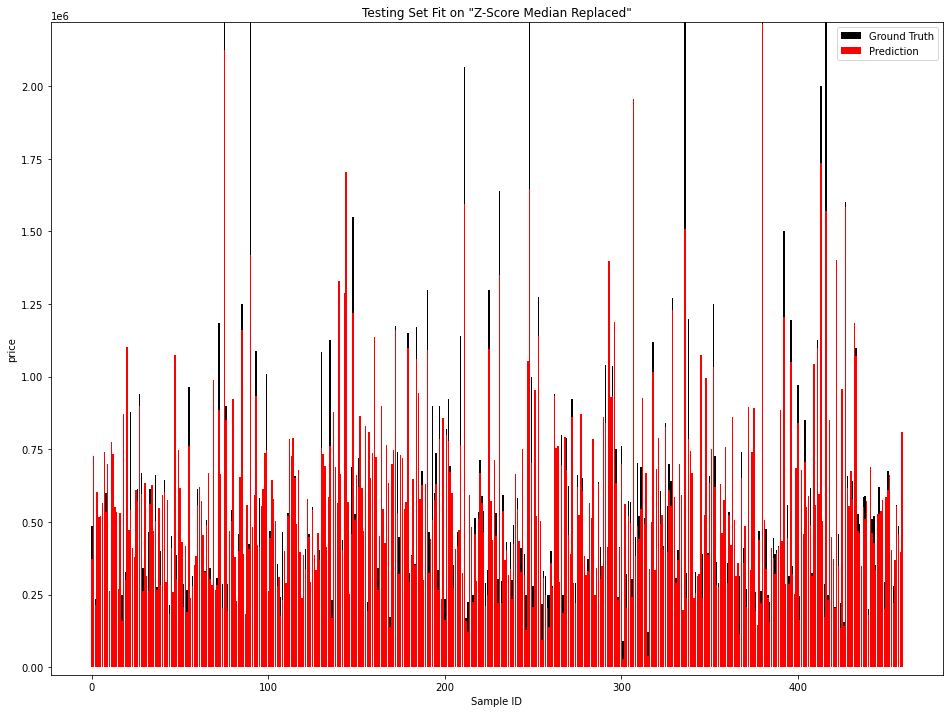

Scaled Testing MSE = 0.191899
Scaled Testing MAE = 0.279174
Testing MSE = 23985697623.646774
Testing MAE = 98699.569661


In [71]:
plt.figure(figsize=(16,12))
groundtruth = scaler[response_feature].inverse_transform(test_y.reshape(-1, 1)).reshape(-1)
prediction = scaler[response_feature].inverse_transform(test_yhat.reshape(-1, 1)).reshape(-1)
plt.bar(np.arange(n_test), groundtruth, label="Ground Truth", color="k", align="center")
plt.bar(np.arange(n_test), prediction, label="Prediction", color="r", align="center")
plt.ylabel(response_features[0])
plt.xlabel("Sample ID")
y_min = min(np.min(groundtruth), np.min(prediction))
y_max = max(np.max(groundtruth), np.max(prediction))
y_max *= 0.75
y_range = y_max - y_min
plt.ylim(y_min-0.025*y_range, y_max+0.025*y_range)
plt.legend()
plt.title("Testing Set Fit on \"%s\"" % (name))
plt.show()
plt.close()
print("Scaled Testing MSE = %.6f" % (compute_mse(test_yhat, test_y)))
print("Scaled Testing MAE = %.6f" % (compute_mae(test_yhat, test_y)))
print("Testing MSE = %.6f" % (compute_mse(prediction, groundtruth)))
print("Testing MAE = %.6f" % (compute_mae(prediction, groundtruth)))

### Discussion of Results
The fit of my model to the testing set seems reasonable. It could certainly be improved with the following changes:
* Using a more complex model - Sklearn's linear regressor is a very simple model and is expected to perform poorly with high dimensional data. Given that the model inputs are 133 dimensional, a more complex model seems appropriate.
* Using a different loss function - When I first examined the target feature price, I noticed that there were many extreme values present. Mean-squared error is widely used to perform regression but, as I am now learning in my research, this is equivalent to fitting a gaussian distribution to the target feature. Since the distribution of the target is heavily right-skewed, we cannot hope to capture such extremes in our trained model. Changing the loss so that we learn a distribution that more closely resembles the target distribution should improve performance.